In [87]:
#whole lotta inputs ASTRO RELated
from astroquery.vizier import Vizier
import astropy.units as u
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
import csv
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.wcs import WCS
import astroquery
from astropy.coordinates import SkyCoord
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
import astropy.io.ascii as ascii
from astropy.table import Table, join, unique
import pandas as pd



import os
import time
import sys
import shutil
from datetime import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patheffects as PathEffects
import matplotlib.colors as pltcolors
from matplotlib import gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as csx
import colorsys
import pandas as pd
import numpy as np
import colormaps as cmaps
from scipy.stats import norm

from astropy.stats import mad_std
from astropy.io import fits
from astropy.timeseries import LombScargle
from astropy.coordinates import ICRS, SkyCoord, Galactic, Galactocentric, GalacticLSR, \
                    LSR, CartesianRepresentation
import astropy.units as u
import astropy.constants as c
from astropy.table import Table

from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import astropy
import matplotlib
from astropy.visualization.wcsaxes import WCSAxes

from collections import Counter
import warnings

#machine learning inputs
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [136]:
galah = Table.read('/Users/alexabeyer/Desktop/research/data/GALAH_DR3_main_allstar_v2.fits')
galah.colnames


['APOGEE_ID',
 'sobject_id',
 'dr2_source_id',
 'dr3_source_id',
 'survey_name',
 'field_id',
 'flag_repeat',
 'wg4_field',
 'wg4_pipeline',
 'flag_sp',
 'teff',
 'e_teff',
 'irfm_teff',
 'irfm_ebv',
 'irfm_ebv_ref',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'flag_fe_h',
 'fe_h_atmo',
 'vmic',
 'vbroad',
 'e_vbroad',
 'chi2_sp',
 'alpha_fe',
 'e_alpha_fe',
 'nr_alpha_fe',
 'flag_alpha_fe',
 'flux_A_Fe',
 'chi_A_Fe',
 'Li_fe',
 'e_Li_fe',
 'nr_Li_fe',
 'flag_Li_fe',
 'C_fe',
 'e_C_fe',
 'nr_C_fe',
 'flag_C_fe',
 'O_fe',
 'e_O_fe',
 'nr_O_fe',
 'flag_O_fe',
 'Na_fe',
 'e_Na_fe',
 'nr_Na_fe',
 'flag_Na_fe',
 'Mg_fe',
 'e_Mg_fe',
 'nr_Mg_fe',
 'flag_Mg_fe',
 'Al_fe',
 'e_Al_fe',
 'nr_Al_fe',
 'flag_Al_fe',
 'Si_fe',
 'e_Si_fe',
 'nr_Si_fe',
 'flag_Si_fe',
 'K_fe',
 'e_K_fe',
 'nr_K_fe',
 'flag_K_fe',
 'Ca_fe',
 'e_Ca_fe',
 'nr_Ca_fe',
 'flag_Ca_fe',
 'Sc_fe',
 'e_Sc_fe',
 'nr_Sc_fe',
 'flag_Sc_fe',
 'Sc2_fe',
 'e_Sc2_fe',
 'nr_Sc2_fe',
 'flag_Sc2_fe',
 'Ti_fe',
 'e_Ti_fe',
 'nr_Ti_fe',
 'fl

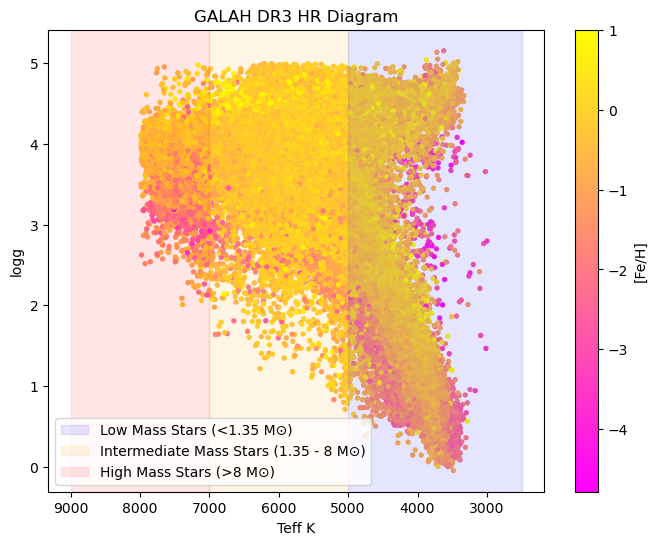

In [128]:
plt.figure(figsize=(8, 6))


sc = plt.scatter(galah['teff'], galah['logg'], c=galah['fe_h'], cmap='spring', s=8)
plt.colorbar(sc, label='[Fe/H]')
plt.gca().invert_xaxis()
plt.xlabel('Teff K')
plt.ylabel("logg")
# plt.ylim(-100,50e4)
plt.title("GALAH DR3 HR Diagram")

#Hr diagram markers 
teff = galah['teff']
# Define mass boundaries (for example, in solar masses)
low_mass = (teff < 6450)  # Low mass stars have lower Teff (this is a rough example)
intermediate_mass = (teff >= 6550) & (teff < 7000)  # Intermediate mass
high_mass = (teff >= 7000)  # High mass stars

# Plot shaded regions for mass groups
plt.axvspan(2500, 5000, color='blue', alpha=0.1, label='Low Mass Stars (<1.35 M⊙)')
plt.axvspan(5000, 7000, color='orange', alpha=0.1, label='Intermediate Mass Stars (1.35 - 8 M⊙)')
plt.axvspan(7000, 9000, color='red', alpha=0.1, label='High Mass Stars (>8 M⊙)')

# # Annotating the regions (optional)
# plt.annotate('Low Mass Stars', xy=(4500, 5), xytext=(4500, 4.7),
#              arrowprops=dict(facecolor='blue', shrink=0.05), color='blue', fontsize=10)
# plt.annotate('Intermediate Mass Stars', xy=(6000, 4), xytext=(6000, 4.2),
#              arrowprops=dict(facecolor='orange', shrink=0.05), color='orange', fontsize=10)
# plt.annotate('High Mass Stars', xy=(18000, -2), xytext=(18000, -2.2),
#              arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=10)

# Show the plot
plt.legend()
plt.savefig('galah_hrdiagram.png')
plt.show()

In [116]:
gaia = Table.read('/Users/alexabeyer/Desktop/machinelearning/gaia_xgboost.fits')

In [117]:
#defining variables 
apparent_mag = gaia['phot_g_mean_mag']
parallax = gaia['parallax']
teff = gaia['teff_xgboost']
abs_mag = apparent_mag * 5 * np.log10(1/parallax)
gaia['abs_mag'] = abs_mag
print(len(gaia))

17558141


In [120]:
#making data cuts 
gaia = gaia[np.where(gaia['abs_mag'] < 18)]
gaia = gaia[np.where(gaia['abs_mag'] > -10)]
gaia = gaia[np.where(gaia['logg_xgboost'] < 3.5)]


gaia

<Table length=2335958>
     source_id              l          ...        abs_mag        
       int64             float64       ...        float64        
------------------- ------------------ ... ----------------------
     15741055975040 176.73918412075122 ...     -8.116049842860605
     66627828480768 176.48356548094657 ...     14.314480684976271
    130399502833792  175.7897591660523 ...      4.017355879762203
    134999412195456 175.95594661610122 ...     -7.654524146965708
    141566417699200 176.99418338336451 ...      5.895077802964569
    180736519432320  176.8645569904345 ...     1.4084783716113285
    187505387880320 177.11925209799298 ...      14.36566529797812
    211316686712704 176.33824132426557 ...      1.957837594014675
    213000313713152 176.24600736130074 ...     3.9793501738609667
                ...                ... ...                    ...
6917484742234241920  48.16456949151421 ... -0.0013105787518389697
6917493710125951104  48.39393986746398 ...     3.1801088942012674
6917498761007422336    48.423183679285 ...      16.84526614871061
6917510546397804544  48.78859497024229 ...     16.547052185598442
6917512333104211456  48.45351654479738 ...     17.485259379783823
6917514184234599552  48.57573508035167 ...      17.59997508778919
6917515734718201472  48.64260679562668 ...     16.334495455044596
6917518002460972672  48.54463212991618 ...     -8.433292660951759
6917522464931567744 48.777837266955785 ...      5.298113520315227
6917523495723447552 48.879484618673104 ...      3.565108024969668

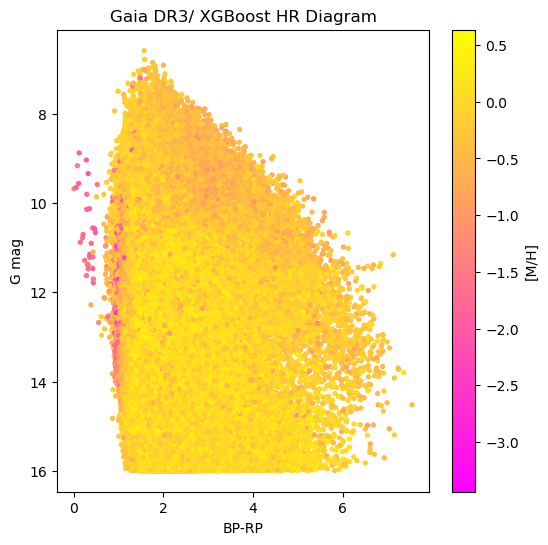

In [143]:
plt.figure(figsize=(6, 6))
bp_rp = gaia['phot_bp_mean_mag'] - gaia['phot_rp_mean_mag']

sc = plt.scatter(bp_rp, gaia['phot_g_mean_mag'], c=gaia['mh_xgboost'], cmap='spring', s=8)
plt.colorbar(sc, label='[M/H]')
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('BP-RP' )
plt.ylabel("G mag")
# plt.ylim(-100,50e4)
plt.title("Gaia DR3/ XGBoost HR Diagram")

# #Hr diagram markers 
# teff = gaia['teff_xgboost']
# # Define mass boundaries (for example, in solar masses)
# low_mass = (teff < 6450)  # Low mass stars have lower Teff (this is a rough example)
# intermediate_mass = (teff >= 6550) & (teff < 7000)  # Intermediate mass
# high_mass = (teff >= 7000)  # High mass stars

# # Plot shaded regions for mass groups
# plt.axvspan(2500, 6550, color='blue', alpha=0.1, label='Low Mass Stars (<1.35 M⊙)')
# plt.axvspan(6550, 7000, color='orange', alpha=0.1, label='Intermediate Mass Stars (1.35 - 8 M⊙)')
# plt.axvspan(7000, 9000, color='red', alpha=0.1, label='High Mass Stars (>8 M⊙)')

# # Annotating the regions (optional)
# plt.annotate('Low Mass Stars', xy=(4500, 5), xytext=(4500, 4.7),
#              arrowprops=dict(facecolor='blue', shrink=0.05), color='blue', fontsize=10)
# plt.annotate('Intermediate Mass Stars', xy=(6000, 4), xytext=(6000, 4.2),
#              arrowprops=dict(facecolor='orange', shrink=0.05), color='orange', fontsize=10)
# plt.annotate('High Mass Stars', xy=(18000, -2), xytext=(18000, -2.2),
#              arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=10)

# Show the plot

plt.savefig('gaia_hrdiagram.png')
plt.show()


In [ ]:
ls